In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
os.chdir("F:/analytics_basics/bike_prediction")

In [3]:
data=pd.read_csv("day.csv")

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [7]:
cat_cnames = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
num_cnames = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [8]:
data[num_cnames].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
data.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

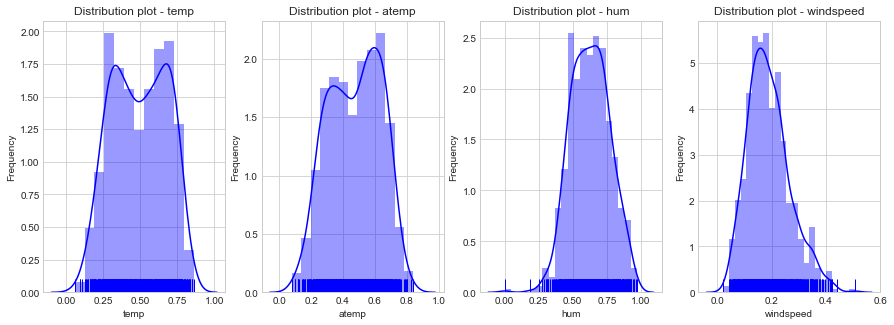

In [10]:
fig0, ax0 = plt.subplots(nrows = 1, ncols = 4, figsize= (15,5))
var = ['temp', 'atemp', 'hum', 'windspeed']
i=0
for j in var:
    ax1 = sns.distplot((data[j]),ax = ax0[i], rug=True, color="b")
    ax1.set_title('Distribution plot - ' +str(j))
    ax1.set_ylabel('Frequency')
    ax1.set_xlabel(str(j))
    i+=1

In [11]:
for i in cat_cnames:
    print(i)
    print(data[i].value_counts())
    print("   ")

season
3    188
2    184
1    181
4    178
Name: season, dtype: int64
   
yr
1    366
0    365
Name: yr, dtype: int64
   
mnth
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64
   
holiday
0    710
1     21
Name: holiday, dtype: int64
   
weekday
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
   
workingday
1    500
0    231
Name: workingday, dtype: int64
   
weathersit
1    463
2    247
3     21
Name: weathersit, dtype: int64
   


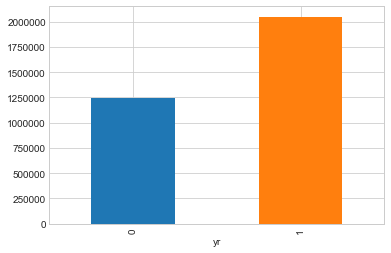

In [12]:
data.groupby('yr')['cnt'].sum().plot.bar(x='yr',y='cnt')

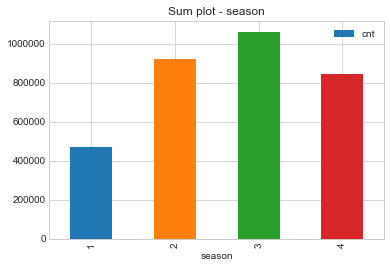

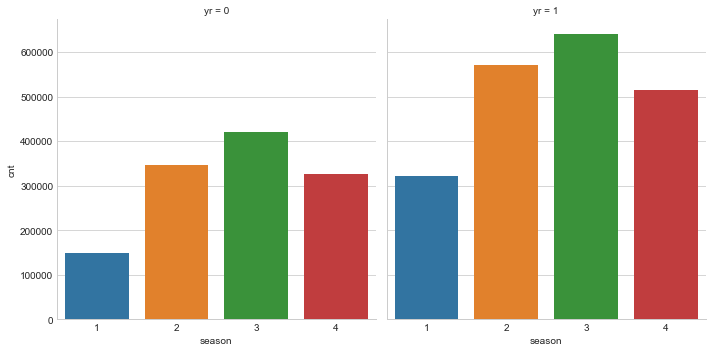

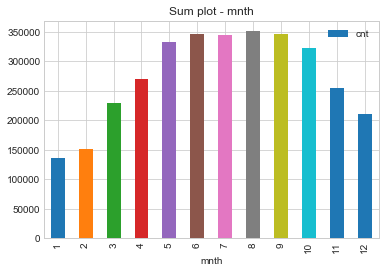

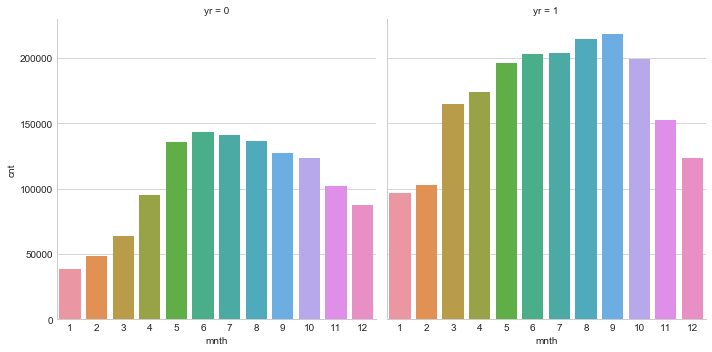

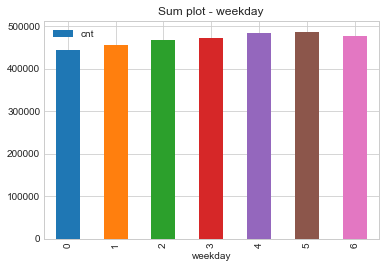

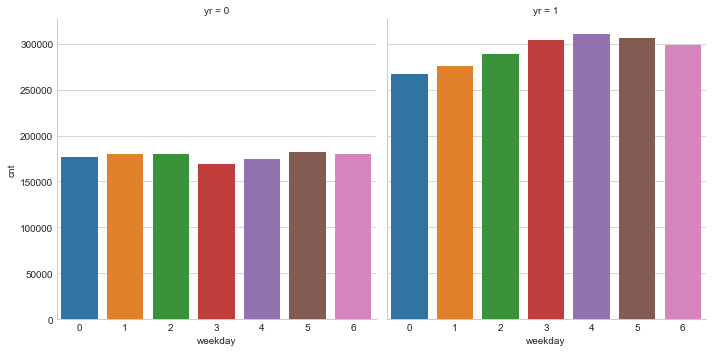

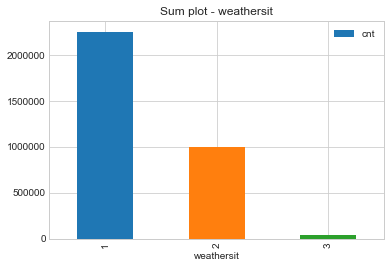

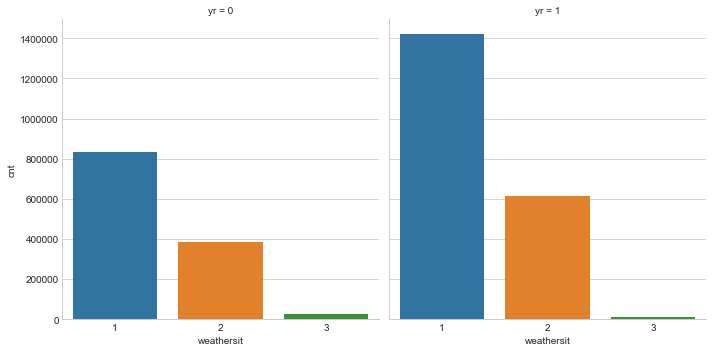

In [13]:
var2 = ['season', 'mnth', 'weekday', 'weathersit']
j=0
for i in var2:
    df = data.groupby(i)['cnt'].sum()
    df = df.reset_index()
    df.plot.bar(x=i,y='cnt').set_title('Sum plot - ' +str(i))
    gp = data.groupby(by = ['yr', i]).sum().reset_index()
    (sns.catplot(x= i, y = 'cnt', data = gp, col = 'yr', kind = 'bar'))
    j+=1

C:\Users\saini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002646FBA7390>,
      dtype=object)

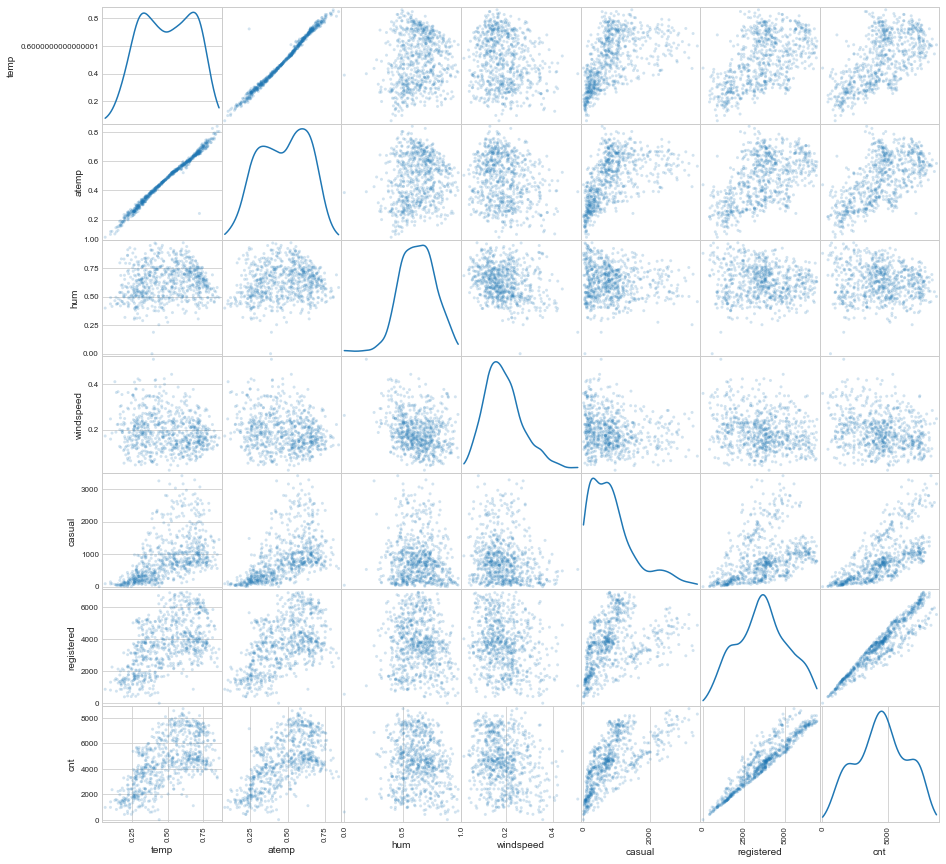

In [14]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data[num_cnames], alpha=0.2, figsize=(15, 15), diagonal='kde')

In [15]:
corr = data[num_cnames].corr()
corr
corr.style.background_gradient()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1,-0.248489,-0.0770079,-0.0910886,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.0770079,-0.167613,1,0.395282,0.672804
registered,0.540012,0.544192,-0.0910886,-0.217449,0.395282,1,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1


In [16]:
# making every combination from cat_cnames
factors_paired = [(i,j) for i in cat_cnames for j in cat_cnames] 
# doing chi-square test for every combination
p_values = []
from scipy.stats import chi2_contingency
for factor in factors_paired:
    if factor[0] != factor[1]:
        chi2, p, dof, ex = chi2_contingency(pd.crosstab(data[factor[0]], 
                                                    data[factor[1]]))
        p_values.append(p.round(3))
    else:
        p_values.append('-')
p_values = np.array(p_values).reshape((7,7))
p_values = pd.DataFrame(p_values, index=cat_cnames, columns=cat_cnames)
print(p_values)

           season     yr   mnth holiday weekday workingday weathersit
season          -    1.0    0.0   0.683     1.0      0.887      0.021
yr            1.0      -    1.0   0.995     1.0       0.98      0.127
mnth          0.0    1.0      -   0.559     1.0      0.993      0.015
holiday     0.683  0.995  0.559       -     0.0        0.0      0.601
weekday       1.0    1.0    1.0     0.0       -        0.0      0.278
workingday  0.887   0.98  0.993     0.0     0.0          -      0.254
weathersit  0.021  0.127  0.015   0.601   0.278      0.254          -


In [17]:

#ANOVA Analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols


cw_lm=ols('cnt ~ C(yr)+C(holiday)+C(workingday)+ C(mnth)+C(weekday)+ C(weathersit)+C(season)', data=data).fit() 
print(sm.stats.anova_lm(cw_lm, typ=2))

                     sum_sq     df            F         PR(>F)
C(yr)          8.281765e+08    1.0  1140.165127  1.645182e-149
C(holiday)     2.982315e+05    1.0     0.410581   5.218829e-01
C(workingday)  1.897657e+07    1.0    26.125377   4.123844e-07
C(mnth)        1.756683e+08   11.0    21.985966   8.868496e-39
C(weekday)     1.621156e+07    6.0     3.719791   1.193190e-03
C(weathersit)  1.856596e+08    2.0   127.800423   4.274469e-48
C(season)      6.632745e+07    3.0    30.438053   1.635986e-18
Residual       5.128140e+08  706.0          NaN            NaN


In [18]:
# Making dummies
season_dm = pd.get_dummies(data['season'], drop_first=True, prefix='season')
data = pd.concat([data, season_dm],axis=1)
data = data.drop(columns = ['season'])
weather_dm = pd.get_dummies(data['weathersit'], prefix= 'weather',drop_first=True)
data = pd.concat([data, weather_dm],axis=1)
data = data.drop(columns= ['weathersit'])


In [19]:
# creating another dataset with removed outliers
# data_wo (data without outliers)- for checking and comparing the performance with the 
data_wo = data.copy()
# dropping outliers from boxplot method
for i in ['windspeed', 'hum']:
    q75, q25 = np.percentile(data_wo.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    data_wo = data_wo.drop(data_wo[data_wo.loc[:,i] < min].index)
    data_wo = data_wo.drop(data_wo[data_wo.loc[:,i] > max].index)

In [20]:
# dropping unwanted columns as decided in feature selection.
data.drop(columns=['instant', 'dteday', 'holiday', 'atemp', 'casual', 'registered'], inplace=True)
data_wo.drop(columns=['instant', 'dteday', 'holiday', 'atemp', 'casual', 'registered'], inplace=True)

data.head()


,yr,mnth,weekday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,weather_2,weather_3
0,0,1,6,0,0.344167,0.805833,0.160446,985,0,0,0,1,0
1,0,1,0,0,0.363478,0.696087,0.248539,801,0,0,0,1,0
2,0,1,1,1,0.196364,0.437273,0.248309,1349,0,0,0,0,0
3,0,1,2,1,0.200000,0.590435,0.160296,1562,0,0,0,0,0
4,0,1,3,1,0.226957,0.436957,0.186900,1600,0,0,0,0,0


In [77]:
####******** Building Machine learning models *******#####

# fuction to check the performance of the regression model using kfold cross validation on explained variance
# also checking the score with the training and test dataset
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
def predictions(regressor_model, X_train, y_train, X_test, y_test):
    regressor_model.fit(X_train, y_train)
    y_pred1 = regressor_model.predict(X_train)
    y_pred2 = regressor_model.predict(X_test)
    # here we are taking the k fold parameter as 10. It will divide the whole dataset into 10 equal parts and check performance taking each part one time as test data and other parts as training data
    performance = cross_val_score(estimator=regressor_model, X = X_train, y = y_train, cv = 10, 
                                       scoring='neg_mean_absolute_error')

    k_fold_performance = -(performance.mean())
    print("K-fold MAE")
    print(k_fold_performance)
    print()
    print("training data MAE")
    print(mean_absolute_error(y_pred1, y_train)) 
    print()
    print("test data MAE")
    print(mean_absolute_error(y_pred2, y_test))

In [78]:
# splitting dataset in train and test for whole dataset
X = data.drop(columns=['cnt'])
y = data['cnt']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [79]:
# splitting dataset in train and test for dataset without outlier
X = data_wo.drop(columns=['cnt'])
y = data_wo['cnt']
from sklearn.model_selection import train_test_split
X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [80]:
#   Linear Regression   #

# building model for dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print("WITH INCLUSION OF OUTLIERS")

predictions(regressor, X_train, y_train, X_test, y_test)
print()

# building model for dataset without  outliers
regressor = LinearRegression()
print()
print("WITHOUT OUTLIERS")
predictions(regressor, X_train_wo, y_train_wo, X_test_wo, y_test_wo)


WITH INCLUSION OF OUTLIERS
K-fold MAE
602.0884324188348

training data MAE
586.2328199481575

test data MAE
612.7238949740137


WITHOUT OUTLIERS
K-fold MAE
618.545675628298

training data MAE
599.460692643405

test data MAE
555.3665114236333


In [83]:
#         KNN           #

# building model for dataset bike_data
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)
print("WITH INCLUSION OF OUTLIERS")
predictions(regressor, X_train, y_train, X_test, y_test)
print()

# building model for dataset  without outliers
regressor = KNeighborsRegressor(n_neighbors=5)
print("WITHOUT OUTLIERS")
predictions(regressor, X_train_wo, y_train_wo, X_test_wo, y_test_wo)


WITH INCLUSION OF OUTLIERS
K-fold MAE
736.6488953828172

training data MAE
567.1078767123288

test data MAE
823.9496598639456

WITHOUT OUTLIERS
K-fold MAE
788.8738052026617

training data MAE
606.8000000000001

test data MAE
728.3444444444444


In [84]:
#        SVM            #

# building model for dataset bike_data
from sklearn.svm import SVR
regressor = SVR()
print("WITH INCLUSION OF OUTLIERS")
predictions(regressor, X_train, y_train, X_test, y_test)
print()

# building model for dataset bike_data_wo i.e. without outliers
regressor = SVR()
print("WITHOUT OUTLIERS")
predictions(regressor, X_train_wo, y_train_wo, X_test_wo, y_test_wo)


WITH INCLUSION OF OUTLIERS


C:\Users\saini\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\saini\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\saini\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\saini\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

K-fold MAE
1541.633414556555

training data MAE
1533.4714462802633

test data MAE
1680.3422148463278

WITHOUT OUTLIERS
K-fold MAE
1516.7871963147704

training data MAE
1509.7285185654002

test data MAE
1762.7738668798677


In [92]:
# Decision Tree Regression  #

# building model for dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1)
print("WITH INCLUSION OF OUTLIERS")
predictions(regressor, X_train, y_train, X_test, y_test)
print()

# building model for dataset without outliers
print("WITHOUT OUTLIERS")
predictions(regressor, X_train_wo, y_train_wo, X_test_wo, y_test_wo)


WITH INCLUSION OF OUTLIERS
K-fold MAE
661.6183226183518

training data MAE
0.0

test data MAE
703.9387755102041

WITHOUT OUTLIERS
K-fold MAE
666.5878402903811

training data MAE
0.0

test data MAE
589.25


In [88]:
#  Random Forest   #

# building model for dataset bike_data
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=1)
print("WITH INCLUSION OF OUTLIERS")
predictions(regressor, X_train, y_train, X_test, y_test)
print()
# building model for dataset bike_data_wo i.e. without outliers
regressor = RandomForestRegressor(random_state=1)
print("WITHOUT OUTLIERS")
predictions(regressor, X_train_wo, y_train_wo, X_test_wo, y_test_wo)


WITH INCLUSION OF OUTLIERS


C:\Users\saini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


K-fold MAE
503.8973115137345

training data MAE
195.1821917808219

test data MAE
488.0448979591837

WITHOUT OUTLIERS


C:\Users\saini\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


K-fold MAE
480.8524682395644

training data MAE
203.9949389179756

test data MAE
476.7604166666667


In [90]:
#     XGBRegressor      #

# building model for dataset bike_data
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state=1)
print("WITH INCLUSION OF OUTLIERS")
predictions(regressor, X_train, y_train, X_test, y_test)
print()

# building model for dataset bike_data_wo i.e. without outliers
regressor = XGBRegressor(random_state=1)
print('WITHOUT OUTLIERS')
predictions(regressor, X_train_wo, y_train_wo, X_test_wo, y_test_wo)


WITH INCLUSION OF OUTLIERS
[21:20:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
K-fold MAE
470.79039147364193

training data MAE
321.68544842445687

test data MAE
533.6797640015479

WITHOUT OUTLIERS
[21:20:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
K-fold MAE
489.300106014891

training data MAE
320.9108204200838

test data MAE
426.6077134874132


In [91]:
#        Hyperparameter tuning             #

# tuning Random Forest for dataset #

from sklearn.model_selection import GridSearchCV
# Random Forest hyperparameter tuning
regressor = RandomForestRegressor(random_state=1)
params = [{'n_estimators' : [500, 600, 800],'max_features':['auto', 'sqrt', 'log2'],
           'min_samples_split':[2,4,6],'max_depth':[12, 14, 16],'min_samples_leaf':[2,3,5],
           'random_state' :[1]}]
grid_search = GridSearchCV(estimator=regressor, param_grid=params,cv = 5,
                           scoring = 'explained_variance', n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 600, 'random_state': 1}


In [97]:
# building Random Forest on tuned parameter
regressor = RandomForestRegressor(random_state=1, max_depth=16, n_estimators=600,
                                  max_features='auto', min_samples_leaf=2,min_samples_split=2)
predictions(regressor, X_train, y_train, X_test, y_test)

K-fold MAE
473.087908010124

training data MAE
220.11370957058546

test data MAE
491.48748069718147


In [94]:
# tuning XGBRegressor for dataset   #

regressor = XGBRegressor(random_state=1)
params = [{'n_estimators' : [250, 300,350, 400,450], 'max_depth':[2, 3, 5], 
           'learning_rate':[0.01, 0.045, 0.05, 0.055, 0.1, 0.3],'gamma':[0, 0.001, 0.01, 0.03],
           'subsample':[1, 0.7, 0.8, 0.9],'random_state' :[1]}]
grid_search = GridSearchCV(estimator=regressor, param_grid=params,cv = 5,
                           scoring = 'explained_variance', n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:20:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'gamma': 0, 'learning_rate': 0.055, 'max_depth': 3, 'n_estimators': 250, 'random_state': 1, 'subsample': 0.7}


In [100]:
# Building XGBRegressor on tuned parameter
regressor = XGBRegressor(random_state=1, learning_rate=0.055, max_depth=3, n_estimators=250, 
                         gamma = 0, subsample=0.7)
predictions(regressor, X_train, y_train, X_test, y_test)

[22:23:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:23:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:23:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:23:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:23:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:23:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:23:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:23:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:23:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:23:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\saini\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:23:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
K-fold MAE
438.31215437371293

training data MAE
271.81761519549644

test data MAE
481.8166580119101
